IMPORTS

In [8]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt

DATA

In [29]:
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# Missing:
  # Type of School
  # Tuition Cost
features_to_keep = [
    'Marital Status',
    'Age at enrollment',
    'Previous qualification',
    'Previous qualification (grade)',
    'Nacionality', # Maybe need to drop this feature
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder'
]

print(X['Nacionality'].value_counts())


Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64


Some initial thoughts on how to bin the qualifications...

Feature 6 is the frequency of higher education... we might need to drop this option (it is currently not included in any of the bins)

We will likely use the following categories:
- No education
      (35, 36)
- Primary education
      (30, 38)
- Primary education dropout
      (11, 26, 37)
- Secondary education
      (1, 13, 20, 27)
- Secondary education dropout
      (9, 10, 12, 14, 19, 29, 25)
- Bachelors education
      (2, 3)
- Higher education
      (4, 5, 40, 43, 44)
- Other education
      (18, 22, 31, 33, 39, 41, 42)
- Unknown
      (34)

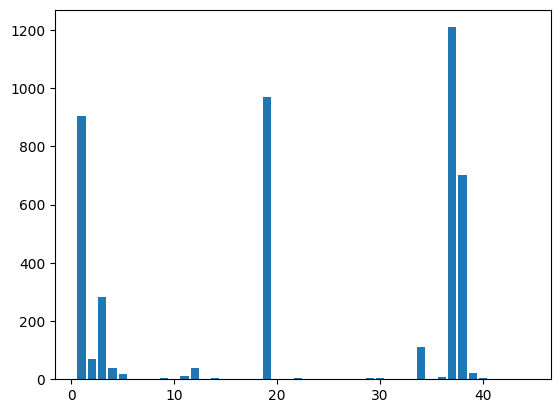

(1, 904)
(2, 68)
(3, 282)
(4, 39)
(5, 18)
(12, 38)
(19, 968)
(34, 112)
(37, 1209)
(38, 702)
(39, 20)


In [22]:
dist = {}

for level in X['Father\'s qualification']:
  if level not in dist.keys():
    dist[level] = 1
  else:
    dist[level] += 1

items = sorted(dist.items())

a, b = zip(*items)
plt.bar(a, b)
plt.show()

for item in sorted(dist.items()):
  if item[1] > 10:
    print(item)